In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train dataset
df = pd.read_csv('Data/train.csv')

In [2]:
def completitud(df):
    """
    Revisa la completitud de un dataframe
    Args:
        df (pandas.DataFrame): Dataframe a examinar. 
    Returns:
        comple: DataFrame con la completitud por columna del dataset original.
    """
    comple=pd.DataFrame(df.isnull().sum())
    comple.reset_index(inplace=True)
    comple=comple.rename(columns={"index":"variable",0:"total"})
    comple["completitud"]=(1-comple["total"]/df.shape[0])*100
    comple=comple.sort_values(by="completitud",ascending=True)
    comple.reset_index(drop=True,inplace=True)
    return comple

In [3]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 17 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   stock_id                 int64  
 1   date_id                  int64  
 2   seconds_in_bucket        int64  
 3   imbalance_size           float64
 4   imbalance_buy_sell_flag  int64  
 5   reference_price          float64
 6   matched_size             float64
 7   far_price                float64
 8   near_price               float64
 9   bid_price                float64
 10  bid_size                 float64
 11  ask_price                float64
 12  ask_size                 float64
 13  wap                      float64
 14  target                   float64
 15  time_id                  int64  
 16  row_id                   object 
dtypes: float64(11), int64(5), object(1)
memory usage: 679.4+ MB


In [4]:
# Display the first few rows of the dataset
df.head()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


In [5]:
# Summary statistics for numerical columns
df.describe()

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id
count,5.237980e+06,5.237980e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237760e+06,2.343638e+06,2.380800e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237980e+06,5.237760e+06,5.237892e+06,5.237980e+06
mean,9.928856e+01,2.415100e+02,2.700000e+02,5.715293e+06,-1.189619e-02,9.999955e-01,4.510025e+07,1.001713e+00,9.996601e-01,9.997263e-01,5.181359e+04,1.000264e+00,5.357568e+04,9.999920e-01,-4.756125e-02,1.331005e+04
std,5.787176e+01,1.385319e+02,1.587451e+02,2.051591e+07,8.853374e-01,2.532497e-03,1.398413e+08,7.214705e-01,1.216920e-02,2.499345e-03,1.114214e+05,2.510042e-03,1.293554e+05,2.497509e-03,9.452860e+00,7.619271e+03
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,9.352850e-01,4.316610e+03,7.700000e-05,7.869880e-01,9.349150e-01,0.000000e+00,9.398270e-01,0.000000e+00,9.380080e-01,-3.852898e+02,0.000000e+00
25%,4.900000e+01,1.220000e+02,1.300000e+02,8.453415e+04,-1.000000e+00,9.987630e-01,5.279575e+06,9.963320e-01,9.971000e-01,9.985290e-01,7.374720e+03,9.990290e-01,7.823700e+03,9.987810e-01,-4.559755e+00,6.729000e+03
50%,9.900000e+01,2.420000e+02,2.700000e+02,1.113604e+06,0.000000e+00,9.999670e-01,1.288264e+07,9.998830e-01,9.998890e-01,9.997280e-01,2.196900e+04,1.000207e+00,2.301792e+04,9.999970e-01,-6.020069e-02,1.334500e+04
75%,1.490000e+02,3.610000e+02,4.100000e+02,4.190951e+06,1.000000e+00,1.001174e+00,3.270013e+07,1.003318e+00,1.002590e+00,1.000905e+00,5.583168e+04,1.001414e+00,5.787841e+04,1.001149e+00,4.409552e+00,1.990700e+04
max,1.990000e+02,4.800000e+02,5.400000e+02,2.982028e+09,1.000000e+00,1.077488e+00,7.713682e+09,4.379531e+02,1.309732e+00,1.077488e+00,3.028784e+07,1.077836e+00,5.440500e+07,1.077675e+00,4.460704e+02,2.645400e+04


In [6]:
df['target'].describe()

count    5.237892e+06
mean    -4.756125e-02
std      9.452860e+00
min     -3.852898e+02
25%     -4.559755e+00
50%     -6.020069e-02
75%      4.409552e+00
max      4.460704e+02
Name: target, dtype: float64

In [7]:
completitud(df)

,variable,total,completitud
0,far_price,2894342,44.743164
1,near_price,2857180,45.452636
2,wap,220,99.995800
3,imbalance_size,220,99.995800
4,reference_price,220,99.995800
5,matched_size,220,99.995800
6,ask_price,220,99.995800
7,bid_price,220,99.995800
8,target,88,99.998320
9,ask_size,0,100.000000


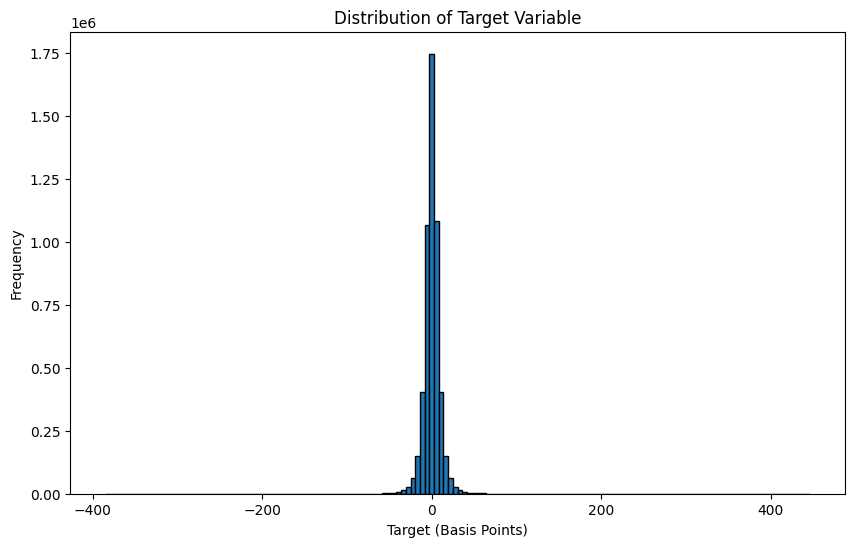

In [8]:
# Visualize the distribution of the target variable (60-second future move)
plt.figure(figsize=(10, 6))
plt.hist(df['target'], bins=150, edgecolor='k')
plt.xlabel('Target (Basis Points)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.show()

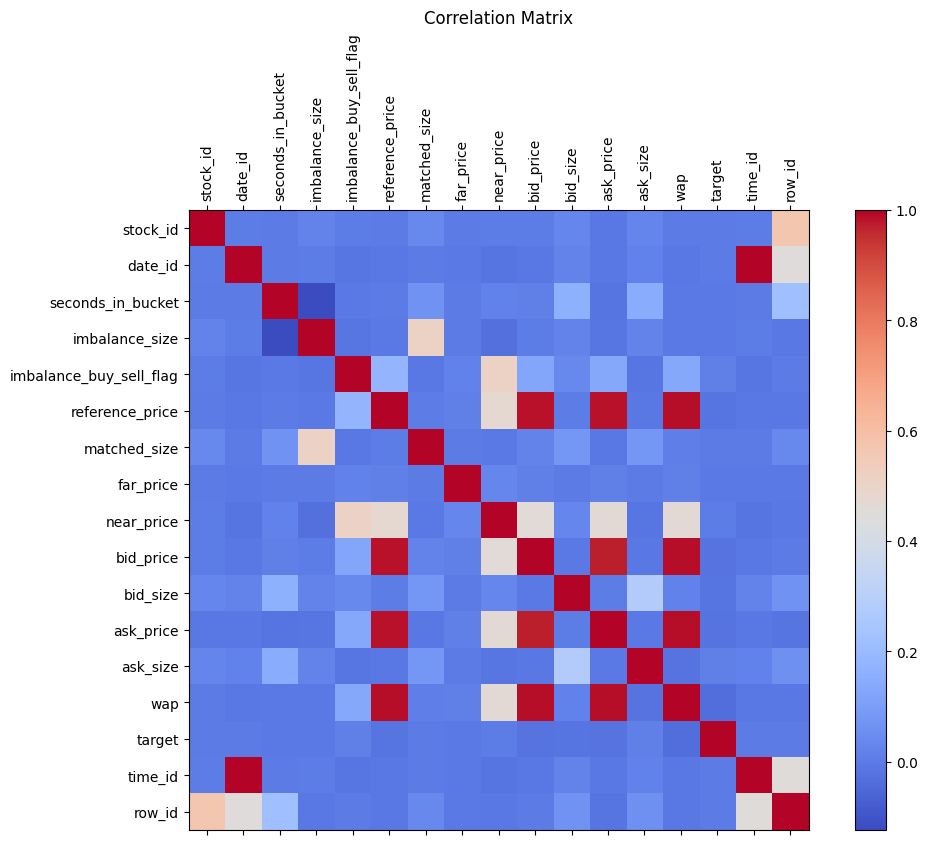

In [9]:
# Visualize the correlation matrix of numerical features
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

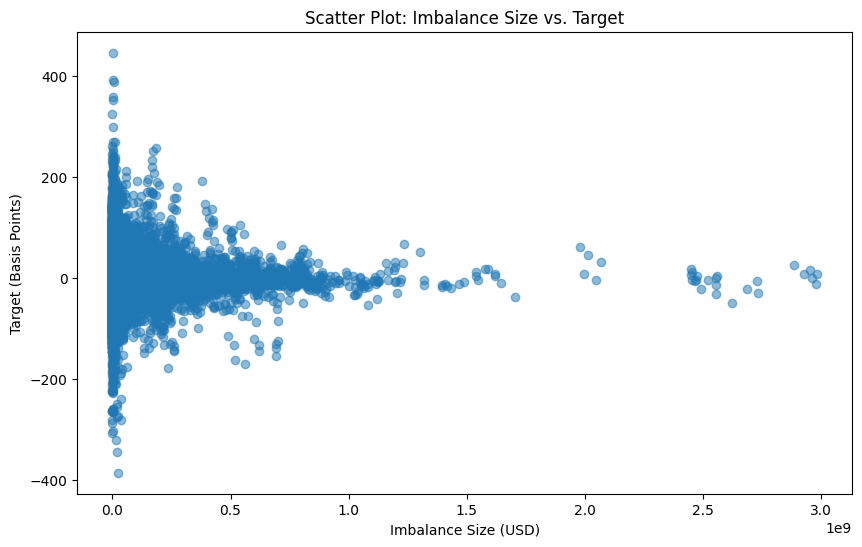

In [10]:
# Visualize a scatter plot of 'imbalance_size' vs. 'target'
plt.figure(figsize=(10, 6))
plt.scatter(df['imbalance_size'], df['target'], alpha=0.5)
plt.xlabel('Imbalance Size (USD)')
plt.ylabel('Target (Basis Points)')
plt.title('Scatter Plot: Imbalance Size vs. Target')
plt.show()

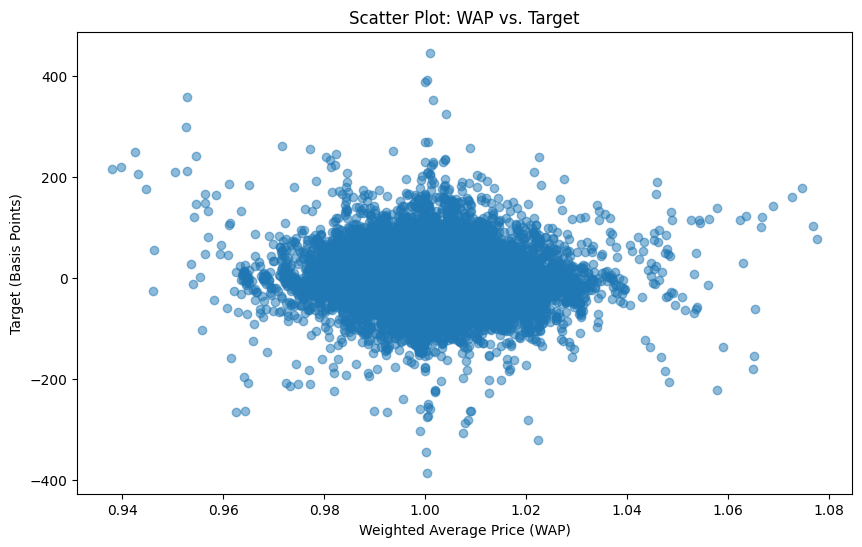

In [11]:
# Visualize a scatter plot of 'wap' vs. 'target'
plt.figure(figsize=(10, 6))
plt.scatter(df['wap'], df['target'], alpha=0.5)
plt.xlabel('Weighted Average Price (WAP)')
plt.ylabel('Target (Basis Points)')
plt.title('Scatter Plot: WAP vs. Target')
plt.show()

In [12]:
#Stock_id únicas
len(df['stock_id'].unique())

200

In [13]:
df.columns

Index(['stock_id', 'date_id', 'seconds_in_bucket', 'imbalance_size',
       'imbalance_buy_sell_flag', 'reference_price', 'matched_size',
       'far_price', 'near_price', 'bid_price', 'bid_size', 'ask_price',
       'ask_size', 'wap', 'target', 'time_id', 'row_id'],
      dtype='object')

In [14]:
def generate_features(df):
    features = ['seconds_in_bucket', 'imbalance_buy_sell_flag',
               'imbalance_size', 'matched_size', 'bid_size', 'ask_size',
                'reference_price','far_price', 'near_price', 'ask_price', 'bid_price', 'wap',
                'imb_s1', 'imb_s2'
               ]
    df['imb_s1'] = df.eval('(bid_size-ask_size)/(bid_size+ask_size)')
    df['imb_s2'] = df.eval('(imbalance_size-matched_size)/(matched_size+imbalance_size)')

    return df[features], df['target']

In [15]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool
# CatBoostRegressor with the best parameters
model = CatBoostRegressor(
    loss_function='MAE',
    verbose=250,
    iterations = 1500, depth = 10, learning_rate = 0.2, l2_leaf_reg = 5, border_count = 128
)

In [17]:
stock_ids = df['stock_id'].unique()
y_test_final = []
y_train_final =[]
y_test_pred_final =[]
y_train_pred_final =[]
for stock_id in stock_ids: 
    print('STOCK_ID', stock_id)
    df_sample = df[df['stock_id']==stock_id]
    df_sample = df_sample.dropna()
    X, y = generate_features(df_sample)
    X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)
    train_data = Pool(X_train, y_train)
    test_data = Pool(X_test, y_test) 
    #Testing data 
    y_train_final = y_train_final+y_train.to_list()
    y_test_final =  y_test_final+y_test.to_list()
    # Fit the model with early stopping and the test dataset for evaluation
    model.fit(train_data, eval_set=test_data, use_best_model=True)
    y_train_predictions = list(model.predict(train_data))
    y_test_predictions  = list(model.predict(test_data))
    # Recovery final predictions 
    y_train_pred_final =  y_train_pred_final + y_train_predictions
    y_test_pred_final  =  y_test_pred_final  + y_test_predictions

STOCK_ID 0
0:	learn: 3.7088051	test: 3.8276488	best: 3.8276488 (0)	total: 22.8ms	remaining: 34.1s
250:	learn: 1.5287343	test: 3.5197119	best: 3.5184942 (247)	total: 6.64s	remaining: 33s
500:	learn: 1.1155831	test: 3.4761009	best: 3.4756197 (488)	total: 14s	remaining: 28s
750:	learn: 0.8972415	test: 3.4702780	best: 3.4702527 (743)	total: 21.3s	remaining: 21.3s
1000:	learn: 0.7729233	test: 3.4619591	best: 3.4608142 (851)	total: 28.7s	remaining: 14.3s
1250:	learn: 0.6892090	test: 3.4644763	best: 3.4608142 (851)	total: 35.7s	remaining: 7.12s
1499:	learn: 0.6236430	test: 3.4613188	best: 3.4599992 (1461)	total: 43.2s	remaining: 0us

bestTest = 3.459999212
bestIteration = 1461

Shrink model to first 1462 iterations.
STOCK_ID 1
0:	learn: 8.0355350	test: 8.2586343	best: 8.2586343 (0)	total: 26.1ms	remaining: 39.2s
250:	learn: 3.2635128	test: 7.3711573	best: 7.3534894 (225)	total: 7.68s	remaining: 38.2s
500:	learn: 2.3791286	test: 7.3318667	best: 7.3276154 (475)	total: 15.9s	remaining: 31.7s
750

In [18]:
from sklearn.metrics import mean_absolute_error
print('Training')
print(mean_absolute_error(y_train_final , y_train_pred_final))
print('Testing')
print(mean_absolute_error(y_test_final, y_test_pred_final))


Training
1.1678362313041477
Testing
4.944904728578736
